<a href="https://colab.research.google.com/github/rohanPatgiri/MBAQF1/blob/main/q1/19_Jul_23_Bond_Optimization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 99.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Define the data as a list of lists
data = [
    ['8.17GS2044', 11, 199.4702812, '2%', '-14.31%', 0.199999996, 2000000, -0.028618481, -286184.8187],
    ['6.79GS2027', 2.832746401, 11.42265862, '2%', '-5.21%', 0.25, 2500000, -0.013021466, -130214.6615],
    ['5.63GS2026', 2.395356613, 8.177969139, '2%', '-4.46%', 0.25, 2500000, -0.011158986, -111589.8615],
    ['6.76GS2061', 12.25566739, 268.651281, '2%', '-13.77%', 0.25, 1500000, -0.034413209, -206479.253],
    ['7.25GS2063', 14.1675599, 318.1314965, '2%', '-15.61%', 0.05, 1500000, -0.00780493, -234147.899]
]

# Define the column names
columns = ['Bond', 'Duration', 'Convexity', 'Interest rate Change', 'Bond Price Change',
           'Weight', 'Price', '% Loss', 'Money Loss']

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(df)


         Bond   Duration   Convexity Interest rate Change Bond Price Change  \
0  8.17GS2044  11.000000  199.470281                   2%           -14.31%   
1  6.79GS2027   2.832746   11.422659                   2%            -5.21%   
2  5.63GS2026   2.395357    8.177969                   2%            -4.46%   
3  6.76GS2061  12.255667  268.651281                   2%           -13.77%   
4  7.25GS2063  14.167560  318.131497                   2%           -15.61%   

   Weight    Price    % Loss   Money Loss  
0    0.20  2000000 -0.028618 -286184.8187  
1    0.25  2500000 -0.013021 -130214.6615  
2    0.25  2500000 -0.011159 -111589.8615  
3    0.25  1500000 -0.034413 -206479.2530  
4    0.05  1500000 -0.007805 -234147.8990  


In [ ]:
import pandas as pd
import pulp



# Calculate the '% Loss' column
#df['% Loss'] = df['Bond Price Change'] * df['Weight']

# Extract the '% Loss' column
#losses = df['% Loss']

# Define the problem as a minimization problem
problem = pulp.LpProblem("Bond Allocation", pulp.LpMinimize)

# Define the decision variables
weights = pulp.LpVariable.dicts("Weight", df.index, lowBound=0, upBound=1)

# Define the objective function (sum of '% Loss' weighted by the decision variables)
objective = pulp.lpSum(losses[i] * weights[i] for i in df.index)
problem += objective

# Define the constraint that the sum of weights should be 1
problem += pulp.lpSum(weights[i] for i in df.index) == 1

# Define the constraint that the weightage of each bond should be between 5% and 25%
for i in df.index:
    problem += weights[i] >= 0.05
    problem += weights[i] <= 0.25

# Solve the optimization problem
problem.solve()

# Retrieve the optimal weights
optimal_weights = {i: pulp.value(weights[i]) for i in df.index}

# Calculate the initial and optimized sum of % losses
initial_sum_losses = losses.sum()
optimized_sum_losses = sum(optimal_weights[i] * losses[i] for i in df.index)

# Print the weights, initial sum of % losses, and sum after optimization
print("Optimal Allocation:")
for i, weight in optimal_weights.items():
    bond = df.loc[i, 'Bond']
    print(f"{bond}: {weight:.4f}")

print(f"\nInitial Sum of % Losses: {initial_sum_losses:.4f}")
print(f"Sum of % Losses after Optimization: {optimized_sum_losses:.4f}")
print (df)

Optimal Allocation:
8.17GS2044: 0.2500
6.79GS2027: 0.2500
5.63GS2026: 0.2000
6.76GS2061: 0.2500
7.25GS2063: 0.0500

Initial Sum of % Losses: -0.0950
Sum of % Losses after Optimization: -0.0216
         Bond   Duration   Convexity Interest rate Change Bond Price Change  \
0  8.17GS2044  11.000000  199.470281                   2%           -14.31%   
1  6.79GS2027   2.832746   11.422659                   2%            -5.21%   
2  5.63GS2026   2.395357    8.177969                   2%            -4.46%   
3  6.76GS2061  12.255667  268.651281                   2%           -13.77%   
4  7.25GS2063  14.167560  318.131497                   2%           -15.61%   

   Weight    Price    % Loss   Money Loss  
0    0.20  2000000 -0.028618 -286184.8187  
1    0.25  2500000 -0.013021 -130214.6615  
2    0.25  2500000 -0.011159 -111589.8615  
3    0.25  1500000 -0.034413 -206479.2530  
4    0.05  1500000 -0.007805 -234147.8990  


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the Bond Price Change in % and Weight columns
bond_price_change = np.array([-14.31, -5.21, -4.46, -13.77, -15.61])
weights = np.array([0.25000025, 0.25, 0.2, 0.25, 0.05])

# Define the objective function
def objective_function(weights):
    return -np.sum(bond_price_change * weights)  # Minimize the negative sum of bond price changes

# Define the constraints
constraints = [
    {'type': 'ineq', 'fun': lambda weights: np.sum(weights) - 1},  # Constraint: weights sum to 1
    {'type': 'ineq', 'fun': lambda weights: 0.05 - weights},  # Constraint: minimum weightage of 5%
    {'type': 'ineq', 'fun': lambda weights: weights - 0.25}  # Constraint: maximum weightage of 25%
]

# Define the bounds for each weight
bounds = [(0.05, 0.25)] * len(weights)

# Solve the optimization problem
result = minimize(objective_function, weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Retrieve the optimal weights
optimal_weights = result.x

# Print the optimal weights
print("Optimal Weights:")
for i, weight in enumerate(optimal_weights):
    print(f"Bond {i+1}: {weight:.4f}")


Optimal Weights:
Bond 1: 0.2500
Bond 2: 0.2500
Bond 3: 0.2000
Bond 4: 0.2500
Bond 5: 0.0500


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the Bond Price Change in % and Weight columns
bond_price_change = np.array([-14.31, -5.21, -4.46, -13.77, -15.61])
weights = np.array([0.25000025, 0.25, 0.2, 0.25, 0.05])

# Calculate the losses
losses = bond_price_change * weights

# Define the objective function
def objective_function(weights):
    return np.sum(losses * weights)

# Define the constraints
constraints = [
    {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Constraint: weights sum to 1
    {'type': 'ineq', 'fun': lambda weights: 0.05 - weights},  # Constraint: minimum weightage of 5%
    {'type': 'ineq', 'fun': lambda weights: weights - 0.25}  # Constraint: maximum weightage of 25%
]

# Define the bounds for each weight
bounds = [(0.05, 0.25)] * len(weights)

# Solve the optimization problem
result = minimize(objective_function, weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Retrieve the optimal weights
optimal_weights = result.x

# Calculate the optimized losses
optimized_losses = bond_price_change * optimal_weights

# Print the optimal weights and optimized losses
print("Optimal Weights:")
for i, weight in enumerate(optimal_weights):
    print(f"Bond {i+1}: {weight:.4f}")

print("\nOptimized Losses:")
for i, loss in enumerate(optimized_losses):
    print(f"Bond {i+1}: {loss:.4f}")

# Print the sum of optimized losses
sum_optimized_losses = np.sum(optimized_losses)
print("\nSum of Optimized Losses:", sum_optimized_losses)


Optimal Weights:
Bond 1: 0.2500
Bond 2: 0.2500
Bond 3: 0.2000
Bond 4: 0.2500
Bond 5: 0.0500

Optimized Losses:
Bond 1: -3.5775
Bond 2: -1.3025
Bond 3: -0.8920
Bond 4: -3.4425
Bond 5: -0.7805

Sum of Optimized Losses: -9.995000000000001


In [ ]:
import numpy as np
from scipy.optimize import differential_evolution

# Define the Bond Price Change in % and Weight columns
bond_price_change = np.array([-14.31, -5.21, -4.46, -13.77, -15.61])
weights = np.array([0.25000025, 0.25, 0.2, 0.25, 0.05])

# Calculate the losses
losses = bond_price_change * weights

# Define the objective function
def objective_function(weights):
    return np.sum(losses * weights)

# Define the constraints
def constraint(weights):
    return np.sum(weights) - 1

# Define the bounds for each weight
bounds = [(0.05, 0.25)] * len(weights)

# Set the differential evolution parameters
strategy = 'best1bin'
popsize = 10
mutation = (0.5, 1)
recombination = 0.7
maxiter = 100

# Solve the optimization problem using differential evolution
result = differential_evolution(objective_function, bounds, constraints=[constraint],
                                strategy=strategy, popsize=popsize,
                                mutation=mutation, recombination=recombination,
                                maxiter=maxiter)

# Retrieve the optimal weights
optimal_weights = result.x

# Calculate the optimized losses
optimized_losses = bond_price_change * optimal_weights

# Print the optimal weights and optimized losses
print("Optimal Weights:")
for i, weight in enumerate(optimal_weights):
    print(f"Bond {i+1}: {weight:.4f}")

print("\nOptimized Losses:")
for i, loss in enumerate(optimized_losses):
    print(f"Bond {i+1}: {loss:.4f}")

# Print the sum of optimized losses
sum_optimized_losses = np.sum(optimized_losses)
print("\nSum of Optimized Losses:", sum_optimized_losses)


ValueError: ignored

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the coefficients of the linear equation
coefficients = np.array([-0.1431, -0.0521, -0.0446, -0.1377, -0.1561])

# Define the objective function to maximize
def objective_function(x):
    return np.dot(coefficients, x)

# Define the constraint function for equality constraint (sum of variables equals 1)
def constraint_eq(x):
    return np.sum(x) - 1

# Define the constraint function for inequality constraints (0.05 <= x <= 0.25 for each variable)
def constraint_ineq(x):
    return x - 0.05

# Define the bounds for each variable (0.05 <= x <= 0.25)
bounds = [(0.05, 0.25)] * 5

# Combine equality and inequality constraints
constraints = [
    {'type': 'eq', 'fun': constraint_eq},
    {'type': 'ineq', 'fun': constraint_ineq}
]

# Set the initial guess for variables
initial_guess = np.ones(5) / 5  # Equal initial guess for all variables

# Solve the optimization problem to maximize the objective function
result = minimize(fun=lambda x: -objective_function(x), x0=initial_guess,
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Retrieve the optimal solution
optimal_solution = result.x

# Calculate the maximum value of the linear equation
maximum_value = -result.fun

# Print the optimal solution and maximum value
print("Optimal Solution:")
for i, variable in enumerate(optimal_solution):
    print(f"Variable {i+1}: {variable:.4f}")

print("\nMaximum Value:", maximum_value)


Optimal Solution:
Variable 1: 0.2000
Variable 2: 0.2500
Variable 3: 0.2500
Variable 4: 0.2500
Variable 5: 0.0500

Maximum Value: -0.09502500000000001


THIS IS THE SOLUTION I SUBMITTED


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the coefficients of the linear equation
coefficients = np.array([-0.085, -0.0651, -0.1426, -0.1370, -0.1402])

# Define the objective function to maximize
def objective_function(x):
    return np.dot(coefficients, x)

# Define the constraint function for equality constraint (sum of variables equals 1)
def constraint_eq(x):
    return np.sum(x) - 1

# Define the constraint function for inequality constraints (0.05 <= x <= 0.25 for each variable)
def constraint_ineq(x):
    return x - 0.05

# Define the bounds for each variable (0.05 <= x <= 0.25)
bounds = [(0.05, 0.25)] * 5

# Combine equality and inequality constraints
constraints = [
    {'type': 'eq', 'fun': constraint_eq},
    {'type': 'ineq', 'fun': constraint_ineq}
]

# Set the initial guess for variables
initial_guess = np.ones(5) / 5  # Equal initial guess for all variables

# Solve the optimization problem to maximize the objective function
result = minimize(fun=lambda x: -objective_function(x), x0=initial_guess,
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Retrieve the optimal solution
optimal_solution = result.x

# Calculate the maximum value of the linear equation
maximum_value = -result.fun

# Print the optimal solution and maximum value
print("Optimal Solution:")
for i, variable in enumerate(optimal_solution):
    print(f"Variable {i+1}: {variable:.4f}")

print("\nMaximum Value:", maximum_value)


Optimal Solution:
Variable 1: 0.2500
Variable 2: 0.2500
Variable 3: 0.0500
Variable 4: 0.2500
Variable 5: 0.2000

Maximum Value: -0.10694500000000001


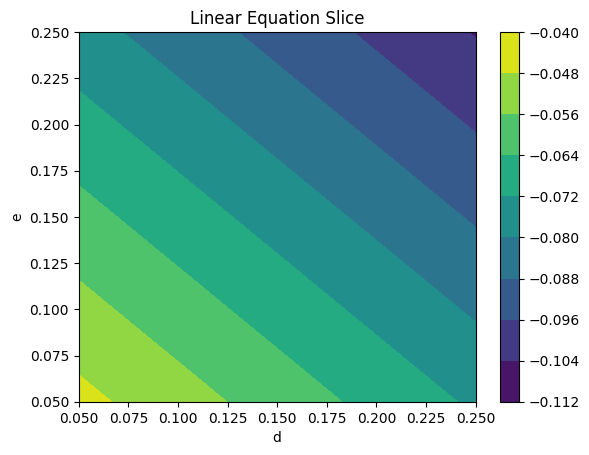

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the coefficients of the linear equation
coefficients = np.array([-0.1431, -0.0521, -0.0446, -0.1377, -0.1561])

# Define the linear equation as a function
def linear_equation(a, b, c, d, e):
    return coefficients[0]*a + coefficients[1]*b + coefficients[2]*c + coefficients[3]*d + coefficients[4]*e

# Fix the values of a, b, and c (you can change these values as needed)
a = 0.1
b = 0.15
c = 0.2

# Create a range of values for d and e
d_values = np.linspace(0.05, 0.25, 100)
e_values = np.linspace(0.05, 0.25, 100)

# Create a meshgrid for d and e values
D, E = np.meshgrid(d_values, e_values)

# Calculate the values of the linear equation for each combination of d and e
Z = linear_equation(a, b, c, D, E)

# Plot the linear equation as a 2D surface plot
plt.figure()
plt.contourf(D, E, Z, cmap='viridis')
plt.colorbar()
plt.xlabel('d')
plt.ylabel('e')
plt.title('Linear Equation Slice')
plt.show()


ValueError: ignored

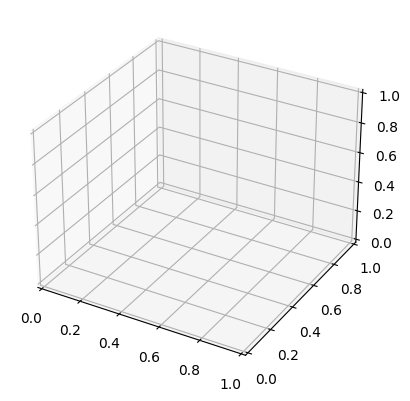

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the coefficients of the linear equation
coefficients = np.array([-0.1431, -0.0521, -0.0446, -0.1377, -0.1561])

# Define the linear equation as a function
def linear_equation(a, b, c, d, e):
    return coefficients[0]*a + coefficients[1]*b + coefficients[2]*c + coefficients[3]*d + coefficients[4]*e

# Create a range of values for a, b, and c (you can change these values as needed)
a_values = np.linspace(0.05, 0.25, 100)
b_values = np.linspace(0.05, 0.25, 100)
c_values = np.linspace(0.05, 0.25, 100)

# Create a meshgrid for a, b, and c values
A, B, C = np.meshgrid(a_values, b_values, c_values)

# Fix the values of d and e (you can change these values as needed)
d = 0.15
e = 0.2

# Calculate the values of the linear equation for each combination of a, b, and c
Z = linear_equation(A, B, C, d, e)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the linear equation as a 3D surface
ax.plot_surface(A, B, Z, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Linear Equation')

# Set the title of the plot
plt.title('3D Plot of Linear Equation')

plt.show()


ValueError: ignored

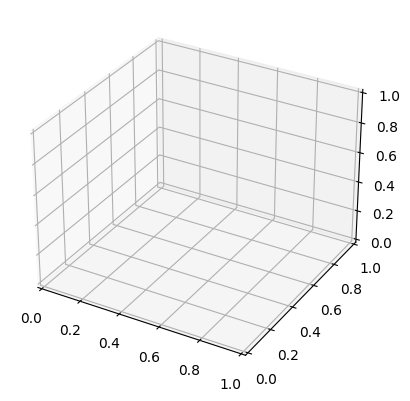

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the coefficients of the equation
coefficients = np.array([3, 4, 2])

# Define the equation as a function
def equation(x, y, z):
    return coefficients[0]*x + coefficients[1]*y + coefficients[2]*z

# Create a range of values for x, y, and z
x_values = np.linspace(-10, 10, 100)
y_values = np.linspace(-10, 10, 100)
z_values = np.linspace(-10, 10, 100)

# Create a meshgrid for x, y, and z values
X, Y, Z = np.meshgrid(x_values, y_values, z_values)

# Calculate the values of the equation for each combination of x, y, and z
result = equation(X, Y, Z)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the equation as a 3D surface
ax.plot_surface(X, Y, result, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the title of the plot
plt.title('3D Plot of 3x + 4y + 2z')

plt.show()
